## **Observations and Analysis**

- Temperature is highest around 0 to 20 deg. N latitude, as can be seen in the city latitude vs max temperature scatter plot. As you move north or south away from this region, temperatures decrease.
- When broken down into hemispheres, the data allows for predicting temperature using linear regression. We see that the northern hemisphere shows a strong negative relationship, with temperatures decreasing as you get to more positive latitudes (away from equator). Conversely, we see that the southern hemisphere shows a strong positive relationship, w/ temperatures decreasing as you move to more negative latitudes (away from equator).
- Humidity, cloudiness, and wind speed show weak relationships. This could be due to the time of day data was pulled, as well as the variability of seasons cities across the globe are experiencing at a single time. 

In [1]:
#import libraries, and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

#assign output csv file name to a variable
output_data_file = 'output_data/cities.csv'

#assign lat and long ranges to variables
lat_range = (-90, 90)
lng_range = (-180, 180)

## **OpenWeather API Call for City Weather**

In [3]:
#initiate empty lists for lat/longs and cities
lat_lngs = []
cities = []

#create uniform distributions of size 1500 of lats and longs, combine lat/longs by zipping 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#iterate through lat/longs and return city name of nearest city, append to cities list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

683

In [28]:
#assign base openweather api url to a variable
base_url = f"http://api.openweathermap.org/data/2.5/weather"

'http://api.openweathermap.org/data/2.5/weather'

In [116]:
#initiate empty list to store city's weather
city_weather_list = []

#iterate through cities
for city in cities:
    
    #store parameters for api in params dictionary; set units to imperial to return deg. F
    params = {'q': city, 'appid': weather_api_key, 'units': 'imperial'}
    
    #send request to api and return as json
    response = requests.get(base_url, params=params).json()
    
    #if response was successful print the response # and city name then append th result to the list
    if response['cod'] == 200:
        print(f"Processing City {cities.index(city)+1} | {city}")
        city_weather_list.append(response)
    
    #if response was not successful, skip the city
    else:
        print(f"City not found. Skipping...")
        
    #delay api calls by 1.2 seconds
    time.sleep(1.2)

Processing City 1 | natal
Processing City 2 | hilo
Processing City 3 | bluff
Processing City 4 | salalah
Processing City 5 | mataura
Processing City 6 | cape town
Processing City 7 | romilly-sur-seine
Processing City 8 | yar-sale
City not found. Skipping...
Processing City 10 | kajaani
Processing City 11 | albany
Processing City 12 | labuhan
Processing City 13 | mizdah
Processing City 14 | saskylakh
Processing City 15 | airai
Processing City 16 | huarmey
Processing City 17 | caravelas
Processing City 18 | kodiak
Processing City 19 | nagato
Processing City 20 | thompson
Processing City 21 | udachnyy
Processing City 22 | port moresby
Processing City 23 | mar del plata
Processing City 24 | buchanan
Processing City 25 | vardo
Processing City 26 | rikitea
Processing City 27 | kavaratti
Processing City 28 | sadon
Processing City 29 | pemberton
Processing City 30 | puerto ayora
Processing City 31 | mahebourg
Processing City 32 | anchorage
Processing City 33 | carnarvon
Processing City 34 | kh

In [123]:
#list comprehensions to assign attributes from api calls to lists
city = [city_weather_list[i]['name'] for i in range(len(city_weather_list))]
cloudiness = [city_weather_list[i]['clouds']['all'] for i in range(len(city_weather_list))]
country = [city_weather_list[i]['sys']['country'] for i in range(len(city_weather_list))]
date = [city_weather_list[i]['dt'] for i in range(len(city_weather_list))]
humidity = [city_weather_list[i]['main']['humidity'] for i in range(len(city_weather_list))]
lat = [city_weather_list[i]['coord']['lat'] for i in range(len(city_weather_list))]
lng = [city_weather_list[i]['coord']['lon'] for i in range(len(city_weather_list))]
max_temp = [city_weather_list[i]['main']['temp_max'] for i in range(len(city_weather_list))]
wind_speed = [city_weather_list[i]['wind']['speed'] for i in range(len(city_weather_list))]


In [124]:
#create dataframe from weather attribute lists
weather_df = pd.DataFrame({'City': city,
                         'Cloudiness': cloudiness,
                         'Country': country,
                         'Date': date,
                         'Humidity': humidity,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': max_temp,
                         'Wind Speed': wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Natal,40,BR,1592242354,62,-5.79,-35.21,87.80,10.29
1,Hilo,1,US,1592242585,83,19.73,-155.09,72.00,3.36
2,Bluff,32,NZ,1592242586,90,-46.60,168.33,49.01,9.84
3,Salalah,40,OM,1592242343,94,17.02,54.09,84.20,6.93
4,Mataura,5,NZ,1592242589,90,-46.19,168.86,43.27,3.89


In [128]:
#check info of df to see how many rows were returned
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        631 non-null    object 
 1   Cloudiness  631 non-null    int64  
 2   Country     631 non-null    object 
 3   Date        631 non-null    int64  
 4   Humidity    631 non-null    int64  
 5   Lat         631 non-null    float64
 6   Lng         631 non-null    float64
 7   Max Temp    631 non-null    float64
 8   Wind Speed  631 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 44.5+ KB


In [134]:
#output df to a csv
weather_df.to_csv(output_data_file)

## **Latitude vs Temperature for All Data**

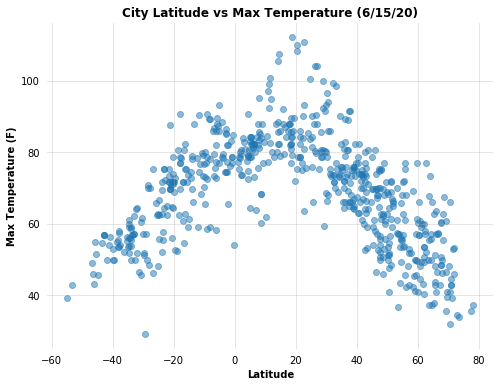

In [282]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Max Temp'], alpha=0.5)
ax.set_title('City Latitude vs Max Temperature (6/15/20)', fontweight='bold')
ax.set_ylabel('Max Temperature (F)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)
plt.savefig('figures/latitude_vs_temp_all_data.png')

## **Latitude vs Humidity for All Data**

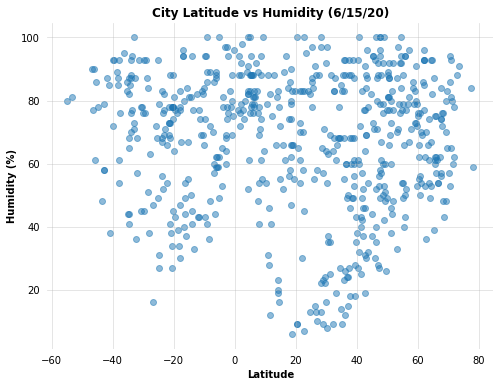

In [283]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Humidity'], alpha=0.5)
ax.set_title('City Latitude vs Humidity (6/15/20)', fontweight='bold')
ax.set_ylabel('Humidity (%)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)
plt.savefig('figures/latitude_vs_humidity_all_data.png')

## **Latitude vs Cloudiness for All Data**

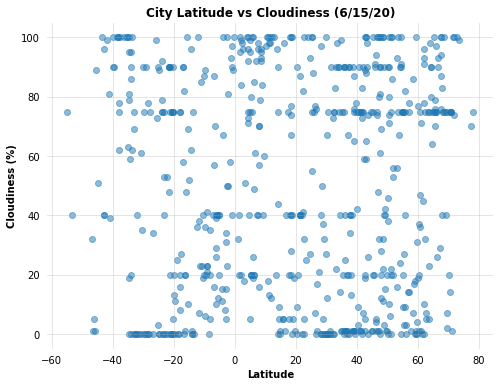

In [284]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Cloudiness'], alpha=0.5)
ax.set_title('City Latitude vs Cloudiness (6/15/20)', fontweight='bold')
ax.set_ylabel('Cloudiness (%)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)
plt.savefig('figures/latitude_vs_cloudiness_all_data.png')

## **Latitude vs Wind Speed for All Data**

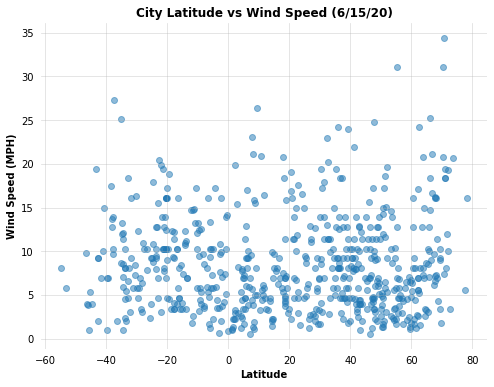

In [285]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Wind Speed'], alpha=0.5)
ax.set_title('City Latitude vs Wind Speed (6/15/20)', fontweight='bold')
ax.set_ylabel('Wind Speed (MPH)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)
plt.savefig('figures/latitude_vs_wind_all_data.png')

In [167]:
northern_hemisphere_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_hemisphere_df = weather_df.loc[weather_df['Lat'] < 0]

In [281]:
northern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Hilo,1,US,1592242585,83,19.73,-155.09,72.00,3.36
3,Salalah,40,OM,1592242343,94,17.02,54.09,84.20,6.93
6,Romilly-sur-Seine,11,FR,1592242651,60,48.51,3.73,69.80,11.41
7,Yar-Sale,93,RU,1592242653,54,66.83,70.83,57.15,16.64
8,Kajaani,98,FI,1592242655,49,64.23,27.73,73.40,6.93


In [270]:
#function to perform linear regression and plot data
def linreg_lat(df, y):
    regression = linregress(df['Lat'], df[y])
    print(f"Correlation is {regression.rvalue}")
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(df['Lat'], df[y], alpha=0.5)
    ax.plot(df['Lat'], regression.slope*df['Lat']+regression.intercept, 'r')
    ax.set_xlabel('Latitude', fontweight='bold')
    ax.set_frame_on(False)
    ax.grid(True, alpha=0.4)
    ax.tick_params(bottom=False, left=False)
    if df['Lat'].min() >=0:
        if y == 'Max Temp':
            ax.set_title('City Latitude vs. Max Temperature for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Max Temperature (F)', fontweight='bold')
            ax.text(50,100, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Northern_Hemisphere_lat_vs_temp_6-15-20.png')
        elif y == 'Humidity':
            ax.set_title('City Latitude vs. Humidity for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Humidity (%)', fontweight='bold')
            ax.text(55,20, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Northern_Hemisphere_lat_vs_humidity_6-15-20.png')
        elif y == 'Cloudiness':
            ax.set_title('City Latitude vs. Cloudiness for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Cloudiness (%)', fontweight='bold')
            ax.text(60,40, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Northern_Hemisphere_lat_vs_cloudiness_6-15-20.png')
        elif y == 'Wind Speed':
            ax.set_title('City Latitude vs. Wind Speed for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Wind Speed (MPH)', fontweight='bold')
            ax.text(15,32, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Northern_Hemisphere_lat_vs_wind_6-15-20.png')
    else:
        if y == 'Max Temp':
            ax.set_title('City Latitude vs. Max Temperature for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Max Temperature (F)', fontweight='bold')
            ax.text(-50,85, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Southern_Hemisphere_lat_vs_temp_6-15-20.png')
        elif y == 'Humidity':
            ax.set_title('City Latitude vs. Humidity for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Humidity (%)', fontweight='bold')
            ax.text(-50,25, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Southern_Hemisphere_lat_vs_humidity_6-15-20.png')
        elif y == 'Cloudiness':
            ax.set_title('City Latitude vs. Cloudiness for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Cloudiness (%)', fontweight='bold')
            ax.text(-50,20, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Southern_Hemisphere_lat_vs_cloudiness_6-15-20.png')
        elif y == 'Wind Speed':
            ax.set_title('City Latitude vs. Wind Speed for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Wind Speed (MPH)', fontweight='bold')
            ax.text(-20,25, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
            plt.savefig('figures/Southern_Hemisphere_lat_vs_wind_6-15-20.png')

## **Latitude vs Temperature for Northern and Southern Hemispheres**

Correlation is -0.7556881824785704


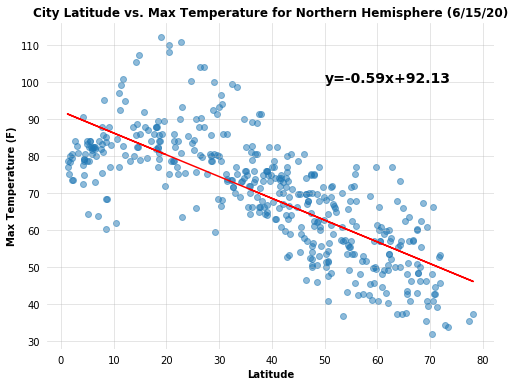

In [271]:
linreg_lat(northern_hemisphere_df, 'Max Temp')

Correlation is 0.7736172256220857


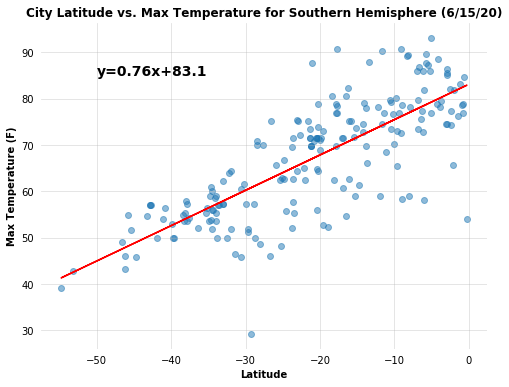

In [272]:
linreg_lat(southern_hemisphere_df, 'Max Temp')

The linear regression is modeling the change in maximum temperature w/ the change in latitude. Here we see as we get to higher latitudes in the northern hemisphere, the temperature decreases. In the souther hemisphere, the temperature decreases as we get to more negative latitudes. Both plots show that as we approach the equator, temperature gets higher.

## **City Latitude vs Humidity for Northern and Southern Hemispheres**

Correlation is 0.004229581165243768


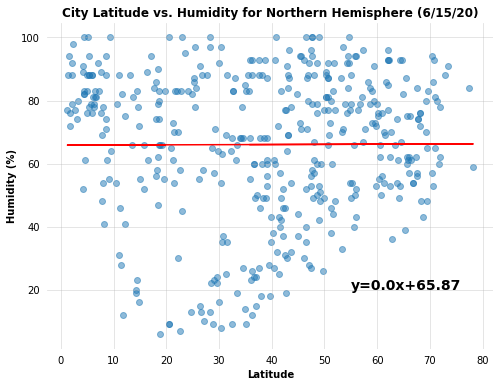

In [273]:
linreg_lat(northern_hemisphere_df, 'Humidity')

Correlation is -0.05144040374448854


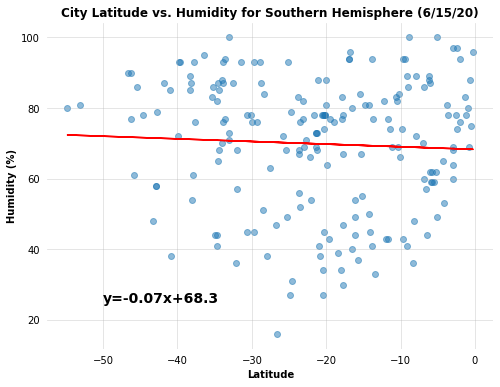

In [274]:
linreg_lat(southern_hemisphere_df, 'Humidity')

The linear regression is modeling the change in humidity w/ the change in latitude. We see very weak relationships in these plots, meaning we can't reliably predict the humidity based solely on latitude.

## **City Latitude vs Cloudiness for Northern and Southern Hemisphere**

Correlation is -0.000727135089602412


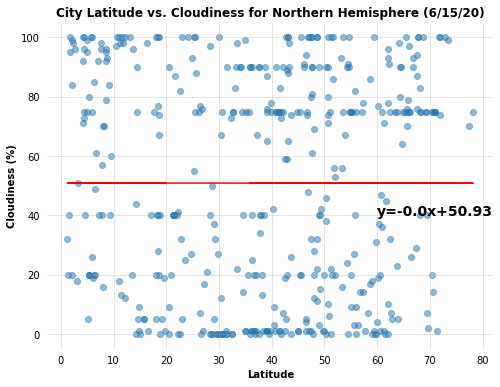

In [275]:
linreg_lat(northern_hemisphere_df, 'Cloudiness')

Correlation is -0.16454668349004534


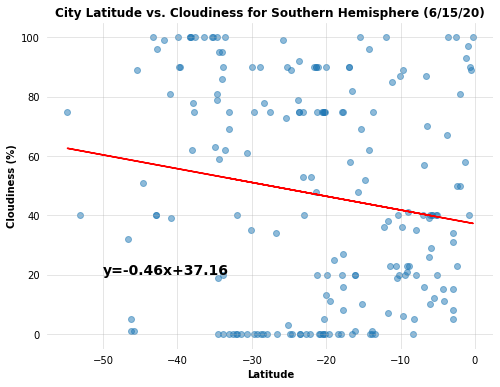

In [276]:
linreg_lat(southern_hemisphere_df, 'Cloudiness')

The linear regression is modeling the change in cloudiness w/ the change in latitude. Again we see weak relationships, meaning we can't reliably predict cloudiness based on latitude alone. The southern hemisphere shows a slightly higher correlation and a negative relationship, showing that as we get closer to the equator, cloudiness decreases.

## **City Latitude vs Wind Speed for Northern and Southern Hemisphere**

Correlation is 0.1276482762722394


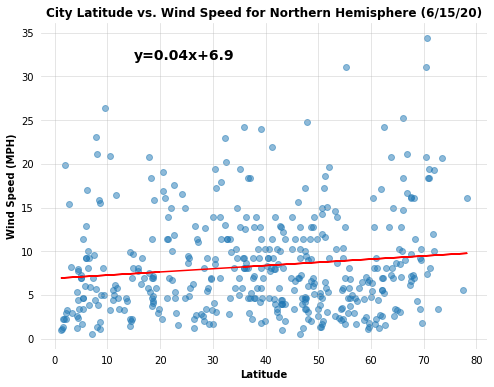

In [277]:
linreg_lat(northern_hemisphere_df, 'Wind Speed')

Correlation is -0.07000686942766256


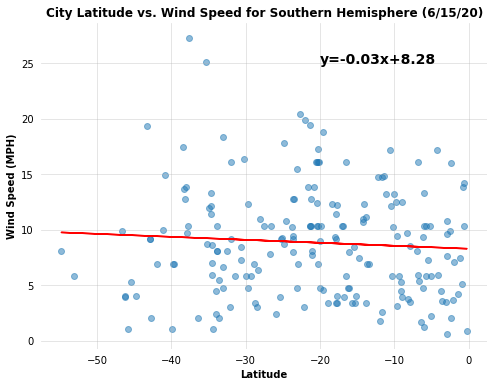

In [278]:
linreg_lat(southern_hemisphere_df, 'Wind Speed')

The linear regression is modeling the change in wind speed w/ the change in latitude. As w/ the last 2 correlations, we see weak relationships. The northern hemisphere shows a weak positive relationship, suggesting wind speed increases as you go north away from the equator. The southern hemisphere shows a weak negative relationship, suggesting wind speed increases as you go south away from the equator.